In [11]:
import numpy as np
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from pandas import DataFrame
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [12]:
data = pd.read_csv("C:\\Users\Hannah\Desktop\Research Project\data.csv")
data = data.drop(["Unnamed: 32", "id"],1)
#includes all features from columns also floats and normalizes them
X = data.values[:,2:-1].astype('float64')
X = (X - np.mean(X, axis =0)) /  np.std(X, axis = 0)
X = np.hstack([np.ones((X.shape[0], 1)),X]) #adds bias column and arrays data into vectors for quicker calculations
X = MinMaxScaler().fit_transform(X)
Y = data["diagnosis"].map({'M':1,'B':0})
Y = np.array(Y)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [19]:
select = SelectFromModel(logreg, threshold=0.9)
select.fit(X_train, Y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)


logreg.fit(X_train, Y_train)
print('Scikit-learn LR accuracy: {:.2f}'.format(logreg.score(X_test, Y_test)*100),  '%')

Scikit-learn LR accuracy: 95.10 %


In [15]:
def Sigmoid(z):
    return 1/(1 + np.exp(-z))

def Hypothesis(theta, X):   
    return Sigmoid(X @ theta) #@ symbol is a decorator to do matrix multiplication and part of python 3.5 only 

In [16]:
def Cost_Function(X,Y,theta,m):
    hi = Hypothesis(theta, X)
    _y = Y.reshape(-1, 1)
    J = 1/float(m) * np.sum(-_y * np.log(hi) - (1-_y) * np.log(1-hi))
    return J

In [17]:
def Cost_Function_Derivative(X,Y,theta,m,alpha):
    hi = Hypothesis(theta,X)
    _y = Y.reshape(-1, 1)
    J = alpha/float(m) * X.T @ (hi - _y)
    return J

def Gradient_Descent(X,Y,theta,m,alpha):
    new_theta = theta - Cost_Function_Derivative(X,Y,theta,m,alpha)
    return new_theta

LR Accuracy all features:  96.5034965035 %
Coefficients (thetas):
[[  3.90254149e-03]
 [  7.71158112e-01]
 [ -9.87884473e+00]
 [ -1.55378469e+00]
 [ -6.51668022e+00]
 [  2.55966968e+00]
 [  1.01188427e+01]
 [  1.42695143e+01]
 [ -2.30317740e+00]
 [ -8.86971805e+00]
 [  9.95796139e+00]
 [ -2.22639126e+00]
 [  7.34931879e+00]
 [  6.79316712e+00]
 [ -3.97976653e+00]
 [ -5.62407272e+00]
 [ -4.87312132e+00]
 [ -5.75198164e+00]
 [ -2.12502788e+00]
 [ -2.71723567e+00]
 [ -1.37418522e+00]
 [  2.47792480e+00]
 [ -1.10452103e+00]
 [  4.63149538e+00]
 [  9.97325842e-01]
 [  1.98121502e+00]
 [  1.74516705e+00]
 [  4.41318436e+00]
 [  3.30105099e+00]]


Plot of LR Coefficients (thetas):


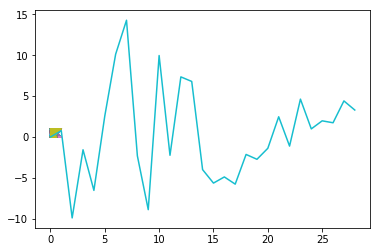

In [18]:
def Accuracy(theta):
    correct = 0
    length = len(X_test)
    prediction = (Hypothesis(theta, X_test) > 0.5) #replaced round to use predictions which are correct is ranging between the Y shape below
    _y = Y_test.reshape(-1, 1)
    correct = prediction == _y
    my_accuracy = (np.sum(correct) / length)*100
    print ('LR Accuracy all features: ', my_accuracy, "%")

def Logistic_Regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha)
        theta = new_theta
        if x % 100 == 0:
            print #('theta: ', theta)    
            print #('cost: ', Cost_Function(X,Y,theta,m))
    Accuracy(theta)
    print("Coefficients (thetas):")
    theta.sort()
    print(theta)
    x = np.linspace(-10, 30, 50)
    y = -(theta[0] + theta[1]*x)/theta[2]
    print("\n")
    print("Plot of LR Coefficients (thetas):")
    plt.plot(X, Y)
    plt.plot(theta)
    plt.show()



ep = .012   #sets initial theta to random non zero numbers +/- .012 specifically is arbitrary

initial_theta = np.random.rand(X_train.shape[1],1) * 2 * ep - ep
alpha = 0.5
iterations = 10000
Logistic_Regression(X_train,Y_train,alpha,initial_theta,iterations)